# **GROUP WORK (FU, Chi Heng Arnold 21055187 , KUSNADI, Vicko Nicholas 21022506 , WONG, Yik Long Thomas 21052719)**



In [2]:
!pip install RMBI3110

  Preparing metadata (setup.py) ... done
  Created wheel for RMBI3110: filename=rmbi3110-2.4.0-py3-none-any.whl size=13147 sha256=856a27f5b35074df5c23d7b6aa43d322d65e5e2fa6ea36bf83f8f32f3b9c76fe
  Stored in directory: /root/.cache/pip/wheels/03/c5/99/f2bb1fac065220b9f66ff6328b1846fc9f7f86bd5135207896
Successfully built RMBI3110


In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import rmbi3110
import statsmodels.api as sm

In [4]:
nasdaq=rmbi3110.data.nasdaq100()
nasdaq_Return_DataFrame = (nasdaq.shift(-1)/nasdaq-1)[:-1]
QQQ=nasdaq_Return_DataFrame["QQQ"]
nasdaq_namelist = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100#Components")[4]["Ticker"].tolist()
nasdaq_namelist.remove("LIN")
nasdaq_namelist.remove("MNST")
nasdaq_Return_DataFrame.drop("QQQ",axis=1)


,ADBE,AMD,ABNB,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,...,TMUS,TSLA,TXN,TTD,VRSK,VRTX,WBD,WDAY,XEL,ZS
date,,,,,,,,,,,,,,,,,,,,,
2010-05-12,-0.011207,NaN,NaN,0.010277,NaN,-0.017937,-0.008338,-0.012721,NaN,-0.006701,...,0.005731,NaN,NaN,NaN,0.012701,-0.007480,0.005000,NaN,NaN,NaN
2010-05-13,-0.020052,NaN,NaN,-0.006260,NaN,-0.021309,-0.009009,-0.021296,NaN,-0.025245,...,-0.006838,NaN,NaN,NaN,0.017492,-0.026507,-0.028856,NaN,NaN,NaN
2010-05-14,0.002669,NaN,NaN,0.000787,NaN,0.003110,-0.000303,0.002194,NaN,0.013396,...,0.035571,NaN,NaN,NaN,-0.002595,0.002670,-0.012807,NaN,NaN,NaN
2010-05-17,-0.015676,NaN,NaN,-0.018883,NaN,-0.021705,-0.011822,-0.002554,NaN,-0.021811,...,-0.032133,NaN,NaN,NaN,-0.014634,-0.012513,NaN,NaN,NaN,NaN
2010-05-18,-0.012019,NaN,NaN,-0.008019,NaN,-0.012678,-0.008896,0.010792,NaN,-0.005405,...,0.005724,NaN,NaN,NaN,-0.010231,0.008897,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,-0.000933,-0.007191,0.017142,0.015743,0.011809,0.031342,-0.007384,-0.024543,-0.006054,-0.006680,...,0.000202,-0.005812,-0.011184,-0.010628,-0.006477,-0.020883,-0.027682,0.006571,-0.004243,0.003935
2025-05-01,0.016656,0.022245,0.010080,0.016925,0.018552,-0.001157,0.001395,-0.009021,0.025034,0.028243,...,0.007611,0.023849,0.039492,0.019412,-0.002071,0.004590,0.013049,0.008394,0.005256,0.015018
2025-05-02,0.000499,0.018117,-0.002954,0.001097,0.001447,-0.019107,-0.002321,-0.004125,-0.004381,-0.011772,...,-0.002330,-0.024198,-0.012704,0.026068,0.002892,-0.001916,-0.019906,-0.001367,0.001696,0.010891


# Objective
To build an improved portfolio management strategy by selecting stocks with favorable risk-adjusted performance (low beta and high alpha), applying Global Minimum Variance Portfolio (GMVP) techniques, and refining allocations using clustering and risk management methods.


# Description

In [5]:
#@title extract data 1 month
def separate_by_month(nasdaq_Return_DataFrame):
    separated_dfs = {}  # Dictionary to store named DataFrames

    for i in range(2010, 2026):
        for j in range(1, 13):
            date_range = f"{i}-{j:02d}"  # Format as 'YYYY-MM'
            filtered_data = nasdaq_Return_DataFrame.loc[nasdaq_Return_DataFrame.index.strftime('%Y-%m') == date_range]

            if not filtered_data.empty:  # Store only non-empty DataFrames
                separated_dfs[f"df_{i}_{j:02d}"] = filtered_data  # Name like 'df_2010_01'

    return separated_dfs

# Convert index to datetime
nasdaq_Return_DataFrame.index = pd.to_datetime(nasdaq_Return_DataFrame.index)

# Get dictionary of named DataFrames
named_dfs = separate_by_month(nasdaq_Return_DataFrame)

# Example: Access January 2012 DataFrame
print(named_dfs["df_2012_02"])

                ADBE  AMD  ABNB     GOOGL  GOOG      AMZN       AEP      AMGN  \
date                                                                            
2012-02-01  0.001601  NaN   NaN  0.006878   NaN  0.013378  0.004315 -0.003150   
2012-02-02  0.017897  NaN   NaN  0.019126   NaN  0.031903  0.000253 -0.004884   
2012-02-03  0.000314  NaN   NaN  0.021448   NaN -0.023454  0.000758 -0.002309   
2012-02-06  0.013183  NaN   NaN -0.003937   NaN  0.005459  0.006816  0.000723   
2012-02-07 -0.005576  NaN   NaN  0.005270   NaN  0.006515 -0.014293 -0.016047   
2012-02-08  0.017134  NaN   NaN  0.002621   NaN -0.002157  0.001526 -0.017925   
2012-02-09 -0.013476  NaN   NaN -0.009150   NaN  0.003243 -0.001778  0.007780   
2012-02-10  0.004346  NaN   NaN  0.010554   NaN  0.032328  0.010433  0.012470   
2012-02-13  0.002782  NaN   NaN -0.003916   NaN -0.001044  0.003274 -0.005279   
2012-02-14  0.000617  NaN   NaN -0.007208   NaN -0.036573 -0.006024  0.000884   
2012-02-15  0.012323  NaN   

In [6]:
#@title extract data 3 month
def combine_three_months(separated_dfs, year, start_month):
    dfs_three_months = []

    for k in range(3):  # Loop for three months
        current_year = year + (start_month + k - 1) // 12  # Adjust year if month exceeds 12
        current_month = (start_month + k - 1) % 12 + 1  # Ensure month wraps correctly

        key = f"df_{current_year}_{current_month:02d}"  # Generate correct key

        if key in separated_dfs:
            dfs_three_months.append(separated_dfs[key])

    if dfs_three_months:  # Ensure we have data before combining
        combined_df = pd.concat(dfs_three_months)
        return combined_df
    else:
        return pd.DataFrame()  # Return empty dataframe if no data is found

# Example: Combine Nov 2023, Dec 2023, and Jan 2024
combined_three_months_df = combine_three_months(named_dfs, 2022, 11)

print(combined_three_months_df)

                ADBE       AMD      ABNB     GOOGL      GOOG      AMZN  \
date                                                                     
2022-11-01 -0.046832 -0.017264 -0.134250 -0.038687 -0.037901 -0.048249   
2022-11-02 -0.050760  0.025243 -0.025315 -0.040704 -0.041116 -0.030612   
2022-11-03 -0.000630  0.034603  0.044230  0.037756  0.038448  0.018813   
2022-11-04  0.048259  0.014311 -0.006556  0.022061  0.022491 -0.004946   
2022-11-07  0.008780  0.012207  0.036036  0.004633  0.002933 -0.006075   
...              ...       ...       ...       ...       ...       ...   
2023-01-25  0.021359  0.003337  0.047683  0.024155  0.025121  0.020992   
2023-01-26  0.013367  0.003193  0.059587  0.018970  0.015631  0.030437   
2023-01-27 -0.019665 -0.039125 -0.055718 -0.024454 -0.027405 -0.016530   
2023-01-30  0.019041  0.037267  0.014889  0.019600  0.019602  0.025659   
2023-01-31  0.036669  0.126281  0.025920  0.016087  0.015620  0.019587   

                 AEP      AMGN       

## Stock Selection Based on Beta and Alpha

We use stocks from the Nasdaq100  index. At the beginning of every one-month cycle from 2012 to 2024: Use the past three months of data to estimate each stock's $\beta$ and $\alpha$ with respect to the QQQ ETF using the CAPM regression (Assume risk-free rate=0):
$$R_i = \alpha_i + \beta_i R_{QQQ} + \varepsilon_i$$
Select the top 5 stocks that satisfy:$0<\beta < 1$ and the highest $\alpha$ values among those stocks



In [7]:
#@title New Algorithm (4 seconds runtime)

import numpy as np
import statsmodels.api as sm


# Function to get sorting key for alpha values
def get_alpha_value(stock_data):
    return stock_data[1]  # Extract alpha value from stock data list

# Function to estimate CAPM parameters
def estimate_capm_params(returns, benchmark_returns,top_n):
    X = benchmark_returns.values.reshape(-1, 1)  # QQQ ETF returns
    X = sm.add_constant(X)  # Add intercept term
    capm_results = []

    for stock in returns.columns:  # Iterate through stocks
        y = returns[stock].values

        if len(y) > 0 and not pd.isnull(y).any():  # Ensure valid data
            model = sm.OLS(y, X).fit()
            alpha, beta = model.params

            if 0 < beta < 1:  # Stock selection criteria
                capm_results.append([stock, alpha, beta])  # Store results as a list

    capm_results.sort(key=get_alpha_value, reverse=True)

    return capm_results[:top_n]  # Return only top 5 stocks


# Initialize lists to store results
stock_list1, stock_list_alpha1, stock_list_beta1 = [], [], []

for year in range(2011, 2025):  # From 2011 to 2024
    start_month = 10 if year == 2011 else 1  # Start in October 2011
    end_month = 9 if year == 2024 else 12  # End in September 2024

    for month in range(start_month, end_month + 1):
        combined_df = combine_three_months(named_dfs, year, month)  # Get three-month data

        if not combined_df.empty:
            stock_returns = combined_df.drop(columns=["QQQ"])  # Extract stock returns
            qqq_returns = combined_df["QQQ"]  # QQQ ETF returns

            selected_stocks = estimate_capm_params(stock_returns, qqq_returns,5)

            # Append selected stocks for this month
            stock_list1.append([stock[0] for stock in selected_stocks])  # Stock names
            stock_list_alpha1.append([stock[1] for stock in selected_stocks])  # Alpha values
            stock_list_beta1.append([stock[2] for stock in selected_stocks])  # Beta values

# Convert lists into NumPy 2D arrays
stock_list1 = np.array(stock_list1, dtype=object)
stock_list_alpha1 = np.array(stock_list_alpha1, dtype=float)
stock_list_beta1 = np.array(stock_list_beta1, dtype=float)

# Print the results
# print(stock_list1)       # Stock names
# print(stock_list_alpha1)  # Alpha values
# print(stock_list_beta1)   # Beta values

for i in range(len(stock_list1)):
  print("Month: ", i+1)
  for j in range(5):
    print(f"Stock: {stock_list1[i][j]}; Alpha: {stock_list_alpha1[i][j]}; Beta: {stock_list_beta1[i][j]}")
  print(" ")



Month:  1
Stock: ISRG; Alpha: 0.003661542341931652; Beta: 0.7315098147240153
Stock: FAST; Alpha: 0.003322247122699651; Beta: 0.9591556128866247
Stock: CHTR; Alpha: 0.003269780318717535; Beta: 0.7016541692973172
Stock: GOOGL; Alpha: 0.0032325279523341827; Beta: 0.8710893384526839
Stock: CTAS; Alpha: 0.0029892144107065664; Beta: 0.8506669907043496
 
Month:  2
Stock: REGN; Alpha: 0.007812730679277069; Beta: 0.8754547271114281
Stock: CTAS; Alpha: 0.0038232740251823395; Beta: 0.7488131616016724
Stock: AMGN; Alpha: 0.003213621256412483; Beta: 0.4389903973721909
Stock: FAST; Alpha: 0.002724185816723546; Beta: 0.9046104251489255
Stock: CHTR; Alpha: 0.0026840994743939028; Beta: 0.7534541290051001
 
Month:  3
Stock: VRTX; Alpha: 0.0050429937442895; Beta: 0.22336322055647945
Stock: AAPL; Alpha: 0.003570102215266084; Beta: 0.9393490143856705
Stock: CMCSA; Alpha: 0.0034496786082229254; Beta: 0.44139757583653655
Stock: CTAS; Alpha: 0.003346606760316341; Beta: 0.39413223718449253
Stock: FAST; Alpha: 

## Strategy 1: Apply GMVP Using Recent Volatility

Assume an  initial capital of $1 million. For each cycle from 2012 to 2024, we use the most recent one month of daily return data for the selected five stocks to compute portfolio weights based on the Global Minimum Variance Portfolio (GMVP) method introduced in the lecture. Then we allocate the capital according to the computed weights and hold the portfolio for one month before proceeding to the next cycle.



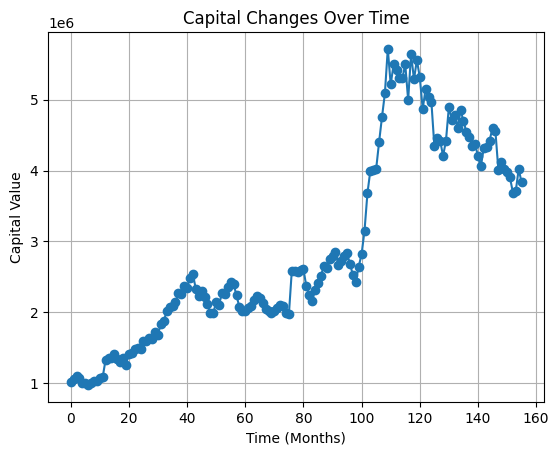

(156, 5)
Final Portfolio:  3833699.341533897


In [8]:
#gmvp function
def gmvp_weights(cov):
    inv_cov = np.linalg.pinv(cov)
    ones = np.ones(len(cov))
    return (inv_cov @ ones) / (ones.T @ inv_cov @ ones)

# initializtion
initial_capital = 1_000_000
monthly_multiplication_results = {}
select5_monthly_multiplication_results = {}
ii_tracker = 0  # Index tracker for stock_list1
# Initialize a list to store selected stock returns for each month
monthly_returns_list = []
gmvp_weights_list = []
gmvp_weights_ans = []



#get the gmvp weight of selected stocks
for i in stock_list1:
  cov_matrix = nasdaq_Return_DataFrame[i].cov()
  cov = cov_matrix.values
  weights = gmvp_weights(cov)

  # Convert to Pandas Series for readability
  gmvp_weights_ans.append(weights)

gmvp_weights_ans_np = np.array(gmvp_weights_ans)

# add 1 to all return and get the returns from the right range
named_dfs = separate_by_month(nasdaq_Return_DataFrame.add(1))

# Filter to only include DataFrames from 2012 to 2024
filtered_named_dfs = {key: df for key, df in named_dfs.items() if int(key.split("_")[1]) >= 2012}

# return of the 5 stocks every month
# Loop through each year's DataFrame in filtered_named_dfs
for key, df in filtered_named_dfs.items():
    # Multiply all values column-wise (cumulative product of returns)
    monthly_multiplication_results[key] = df.prod(axis=0)


    # Check if stock_list1 has an entry for this month
    if ii_tracker < len(stock_list1):
        selected_stocks = stock_list1[ii_tracker]  # Get the list of 5 stocks for this month
        available_stocks = [stock for stock in selected_stocks if stock in monthly_multiplication_results[key].index]
        select5_monthly_multiplication_results[key] = monthly_multiplication_results[key][available_stocks]

    ii_tracker += 1  # Increment to get stocks for the next month



#get final profolio value
# Loop through each month's DataFrame in select5_monthly_multiplication_results
for key, df in select5_monthly_multiplication_results.items():
    # Convert the series to a NumPy array and ensure we have exactly 5 stocks
    stock_returns = df.values  # Extract values from the DataFrame

    # If fewer than 5 stocks exist, pad with NaN or zeros
    if stock_returns.shape[0] < 5:
        stock_returns = np.pad(stock_returns, (0, 5 - stock_returns.shape[0]), constant_values=np.nan)

    monthly_returns_list.append(stock_returns)  # Append to list

# Convert the list to a 2D NumPy array with shape (156, 5)
monthly_returns_np = np.array(monthly_returns_list)
final_profolio = (np.prod(np.sum(gmvp_weights_ans_np * monthly_returns_np, axis=1)))*initial_capital

#plot graph for ervery month's return
return_mul=np.sum(gmvp_weights_ans_np * monthly_returns_np, axis=1)
current_capitial=initial_capital
plot_current_capitial=[]
for z in range(len(return_mul)):
  current_capitial*=return_mul[z]
  plot_current_capitial.append(current_capitial)
np_plot_current_capitial = np.array(plot_current_capitial)
plt.plot(np.arange(156), np_plot_current_capitial,marker='o', linestyle='-')
plt.xlabel('Time (Months)')
plt.ylabel('Capital Value')
plt.title('Capital Changes Over Time')
plt.grid(True)
plt.show()

# Check the shape
print(monthly_returns_np.shape)  # Expected: (156, 5)
print("Final Portfolio: ", final_profolio)

## Performance metrices of Strategy 1

In [9]:
# @title Monthly Sharpe Ratio
#print(return_mul.shape)
sharpe_ratio = (return_mul.mean()-1)/(return_mul.std())
print(sharpe_ratio)

0.17565489144561705


In [10]:
# @title Annual Sharpe Ratio
Annual_sharpe_ratio = sharpe_ratio * (12**0.5)
print(Annual_sharpe_ratio)

0.608486393163609


In [11]:
# @title Maximum Drawdown
cumulative = pd.DataFrame(return_mul).cumprod()
print(cumulative)
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max
max_drawdown = drawdown.min()
print('max_drawdown:', max_drawdown)

            0
0    1.016215
1    1.058172
2    1.104939
3    1.071117
4    1.006988
..        ...
151  3.904903
152  3.689955
153  3.716010
154  4.020241
155  3.833699

[156 rows x 1 columns]
max_drawdown: 0   -0.354644
dtype: float64


## Startegy 2: Enhance Portfolio Construction Using Clustering (Enhancement of Strategy 1)

At the beginning of each one-month cycle, we cluster the constituent stocks of the Nasdaq100 index into five distinct groups based on return characteristics, using the most recent three months of historical returns as input features for clustering. From each cluster, select one stock that satisfies 0 < \beta < 1 and has the highest alpha among the qualifying stocks. Then, we onstruct a Global Minimum Variance Portfolio (GMVP) using the selected five stocks, and hold the portfolio for one month. Finally, we compare the performance of this clustering-enhanced strategy with those in strategy 1 using the annualized Sharpe ratio and maximum drawdown as evaluation metrics.

Period:  1
Stock: REGN; Alpha: 0.3092873471312658; Beta: 0.6902579649343334
Stock: ORLY; Alpha: 0.4550230830811126; Beta: 0.5470510597472433
Stock: COST; Alpha: 0.5890824960749668; Beta: 0.4108015021674192
Stock: KDP; Alpha: 0.6109900875165082; Beta: 0.3888756364014727
Stock: DXCM; Alpha: 0.06527591829054247; Beta: 0.9310739850865069
 
Period:  2
Stock: ORLY; Alpha: 0.4550230830811126; Beta: 0.5470510597472433
Stock: COST; Alpha: 0.5890824960749668; Beta: 0.4108015021674192
Stock: KDP; Alpha: 0.6109900875165082; Beta: 0.3888756364014727
Stock: DXCM; Alpha: 0.06527591829054247; Beta: 0.9310739850865069
Stock: CTAS; Alpha: 0.25501011242350846; Beta: 0.7488131616016733
 
Period:  3
Stock: COST; Alpha: 0.5890824960749668; Beta: 0.4108015021674192
Stock: KDP; Alpha: 0.6109900875165082; Beta: 0.3888756364014727
Stock: DXCM; Alpha: 0.06527591829054247; Beta: 0.9310739850865069
Stock: CTAS; Alpha: 0.25501011242350846; Beta: 0.7488131616016733
Stock: VRTX; Alpha: 0.5873138002173413; Beta: 0.412

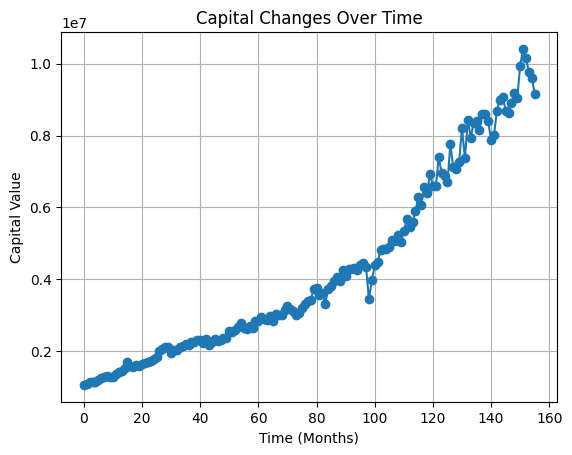

(156, 5)
9150980.482116295


In [12]:
#@title New Algorithm for Problem 3 (K-MEAN)

stock_result3 = []
stock_list3, stock_list_alpha3, stock_list_beta3 = [], [], []

# Initialize lists to store results


for year in range(2011, 2025):  # From 2011 to 2024
    start_month = 10 if year == 2011 else 1  # Start in October 2011
    end_month = 9 if year == 2024 else 12  # End in September 2024

    for month in range(start_month, end_month + 1):
        combined_df = combine_three_months(named_dfs, year, month)  # Get three-month data

        if not combined_df.empty:
            stock_returns = combined_df.drop(columns=["QQQ"])  # Extract stock returns
            qqq_returns = combined_df["QQQ"]  # QQQ ETF returns

            selected_stocks = estimate_capm_params(stock_returns, qqq_returns,len(stock_returns))
            stock_list1, stock_list_alpha1, stock_list_beta1 = [], [], []
            # Append selected stocks for this month
            stock_list1.append([stock[0] for stock in selected_stocks if stock[2]<1 and stock[2]>0])  # Stock names
            stock_list_alpha1.append([stock[1] for stock in selected_stocks if stock[2]<1 and stock[2]>0])  # Alpha values
            stock_list_beta1.append([stock[2] for stock in selected_stocks if stock[2]<1 and stock[2]>0])  # Beta values



            stock_returns = combined_df[stock_list1[0]]  # Extract stock returns
            qqq_returns = combined_df["QQQ"]  # QQQ ETF returns
            feature_matrix = stock_returns.T.dropna()

            kmeans = KMeans(n_clusters=5, random_state=100)
            clusters = kmeans.fit_predict(feature_matrix)
            for cluster_number in range(5):
              reslt__ = estimate_capm_params(stock_returns[feature_matrix.index[clusters == cluster_number]],qqq_returns,1)
              try:
                stock_result3.append(reslt__[0])
              except:
                stock_result3.append(np.nan)




for stock in stock_result3:
  if stock is not np.nan:
    stock_list3.append(stock[0])
    stock_list_alpha3.append(stock[1])
    stock_list_beta3.append(stock[2])
  else:
    stock_list3.append(np.nan)
    stock_list_alpha3.append(np.nan)
    stock_list_beta3.append(np.nan)
new_stock_list3 = []
new_stock_list_alpha3 = []
new_stock_list_beta3 = []

x = 0
for i in range(int(len(stock_list3)/5)):
  new_stock_list3.append(stock_list3[i:i+5])
  x +=1
x = 0
for i in range(int(len(stock_list_alpha3)/5)):
  new_stock_list_alpha3.append(stock_list_alpha3[i:i+5])
  x +=1
x = 0
for i in range(int(len(stock_list_beta3)/5)):
  new_stock_list_beta3.append(stock_list_beta3[i:i+5])
  x +=1


for i in range(len(new_stock_list3)):
  print("Period: ", i+1)
  for j in range(5):
    try:
      print(f"Stock: {new_stock_list3[i][j]}; Alpha: {new_stock_list_alpha3[i][j]}; Beta: {new_stock_list_beta3[i][j]}")
    except:
      print("fail")
  print(" ")




# initializtion
initial_capital = 1_000_000
monthly_multiplication_results = {}
select5_monthly_multiplication_results = {}
ii_tracker = 0  # Index tracker for new_stock_list3
# Initialize a list to store selected stock returns for each month
monthly_returns_list = []
gmvp_weights_list = []
gmvp_weights_ans = []



#get the gmvp weight of selected stocks
for i in new_stock_list3:
  cov_matrix = nasdaq_Return_DataFrame[i].cov()
  cov = cov_matrix.values
  weights = gmvp_weights(cov)

  # Convert to Pandas Series for readability
  gmvp_weights_ans.append(weights)

gmvp_weights_ans_np = np.array(gmvp_weights_ans)




# add 1 to all return and get the returns from the right range
named_dfs = separate_by_month(nasdaq_Return_DataFrame.add(1))

# Filter to only include DataFrames from 2012 to 2024
filtered_named_dfs = {key: df for key, df in named_dfs.items() if int(key.split("_")[1]) >= 2012}





# return of the 5 stocks every month
# Loop through each year's DataFrame in filtered_named_dfs
for key, df in filtered_named_dfs.items():
    # Multiply all values column-wise (cumulative product of returns)
    monthly_multiplication_results[key] = df.prod(axis=0)

    # Check if stock_list1 has an entry for this month
    if ii_tracker < len(new_stock_list3):
        selected_stocks = new_stock_list3[ii_tracker]  # Get the list of 5 stocks for this month
        available_stocks = [stock for stock in selected_stocks if stock in monthly_multiplication_results[key].index]
        select5_monthly_multiplication_results[key] = monthly_multiplication_results[key][available_stocks]

    ii_tracker += 1  # Increment to get stocks for the next month



#get final profolio value
# Loop through each month's DataFrame in select5_monthly_multiplication_results
for key, df in select5_monthly_multiplication_results.items():
    # Convert the series to a NumPy array and ensure we have exactly 5 stocks
    stock_returns = df.values  # Extract values from the DataFrame

    # If fewer than 5 stocks exist, pad with NaN or zeros
    if stock_returns.shape[0] < 5:
        stock_returns = np.pad(stock_returns, (0, 5 - stock_returns.shape[0]), constant_values=np.nan)

    monthly_returns_list.append(stock_returns)  # Append to list

# Convert the list to a 2D NumPy array with shape (156, 5)
monthly_returns_np = np.array(monthly_returns_list)
final_profolio = (np.prod(np.sum(gmvp_weights_ans_np * monthly_returns_np, axis=1)))*initial_capital

#plot graph for ervery month's return
return_mul=np.sum(gmvp_weights_ans_np * monthly_returns_np, axis=1)
current_capitial=initial_capital
plot_current_capitial=[]
for z in range(len(return_mul)):
  current_capitial*=return_mul[z]
  plot_current_capitial.append(current_capitial)
np_plot_current_capitial = np.array(plot_current_capitial)
plt.plot(np.arange(156), np_plot_current_capitial,marker='o', linestyle='-')
plt.xlabel('Time (Months)')
plt.ylabel('Capital Value')
plt.title('Capital Changes Over Time')
plt.grid(True)
plt.show()

# Check the shape
print(monthly_returns_np.shape)  # Expected: (156, 5)
#print(monthly_returns_np)  # Displays the final 2D array
print(final_profolio)


In [13]:
# @title Monthly Sharpe Ratio
Monthly_sharpe_ratio_3 = (return_mul.mean()-1)/(return_mul.std())
print(Monthly_sharpe_ratio_3)


0.3091538656802547


In [14]:

# @title Annual Sharpe Ratio
Annual_sharpe_ratio_3 = Monthly_sharpe_ratio_3 * (12**0.5)
print(Annual_sharpe_ratio_3)

1.0709404054290508


In [15]:
# @title Maximum Drawdown
cumulative = pd.DataFrame(return_mul).cumprod()
print(cumulative)
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max
max_drawdown = drawdown.min()
print('max_drawdown:', max_drawdown*100, "%")

             0
0     1.065507
1     1.097018
2     1.151144
3     1.144635
4     1.135589
..         ...
151  10.408682
152  10.147753
153   9.760925
154   9.611050
155   9.150980

[156 rows x 1 columns]
max_drawdown: 0   -22.401528
dtype: float64 %


In [16]:
# 1) Compute monthly returns (excess over 0)
monthly_factors = return_mul               # e.g. [1.02, 0.98, …]
monthly_rets    = monthly_factors - 1.0     # e.g. [0.02, -0.02, …]

# 2) (Optional) subtract a monthly risk-free rate
rf_annual  = 0.02                           # e.g. 2% p.a.
rf_monthly = (1 + rf_annual)**(1/12) - 1
excess_rets = monthly_rets - rf_monthly

# 3) Monthly Sharpe
sharpe_m = excess_rets.mean() / excess_rets.std(ddof=1)
print(f"Monthly Sharpe: {sharpe_m:.3f}")

# 4) Annualized Sharpe
sharpe_ann = sharpe_m * np.sqrt(12)
print(f"Annualized Sharpe: {sharpe_ann:.3f}")

# 5) Maximum Drawdown
# Build a running peak of your capital series:
cap = np.array(plot_current_capitial)    # shape (T,)
running_max = np.maximum.accumulate(cap)
drawdowns   = (cap - running_max) / running_max
max_dd = drawdowns.min()
print(f"Maximum Drawdown: {max_dd:.2%}")

Monthly Sharpe: 0.275
Annualized Sharpe: 0.954
Maximum Drawdown: -22.40%
